In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [2]:
data_csv = pd.read_csv('data\usd_inr.csv')
data_csv.set_index(['Date'], inplace=True)
data_csv.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
30-05-2023,82.665,82.557,82.794,82.548,0,0.0010
29-05-2023,82.586,82.591,82.682,82.511,0,0.0002
26-05-2023,82.570,82.745,82.748,82.542,0,-0.0020
25-05-2023,82.733,82.680,82.821,82.666,0,0.0008
24-05-2023,82.670,82.880,82.897,82.570,0,-0.0019


In [3]:
data_csv = data_csv.iloc[::-1]
data_csv.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
01-01-2010,46.615,46.610,46.677,46.590,0,0.0044
04-01-2010,46.295,46.545,46.655,46.245,0,-0.0069
05-01-2010,46.205,46.305,46.305,46.045,0,-0.0019
06-01-2010,45.695,46.165,46.205,45.695,0,-0.0110
07-01-2010,45.650,45.610,45.890,45.570,0,-0.0010


In [4]:
data_csv.drop(columns=['Volume'],axis=1,inplace=True)

In [5]:
data_csv.head()

,Price,Open,High,Low,Chg%
Date,,,,,
01-01-2010,46.615,46.610,46.677,46.590,0.0044
04-01-2010,46.295,46.545,46.655,46.245,-0.0069
05-01-2010,46.205,46.305,46.305,46.045,-0.0019
06-01-2010,45.695,46.165,46.205,45.695,-0.0110
07-01-2010,45.650,45.610,45.890,45.570,-0.0010


In [7]:
cols = list(data_csv)[0:5]
print(cols)

['Price', 'Open', 'High', 'Low', 'Chg%']


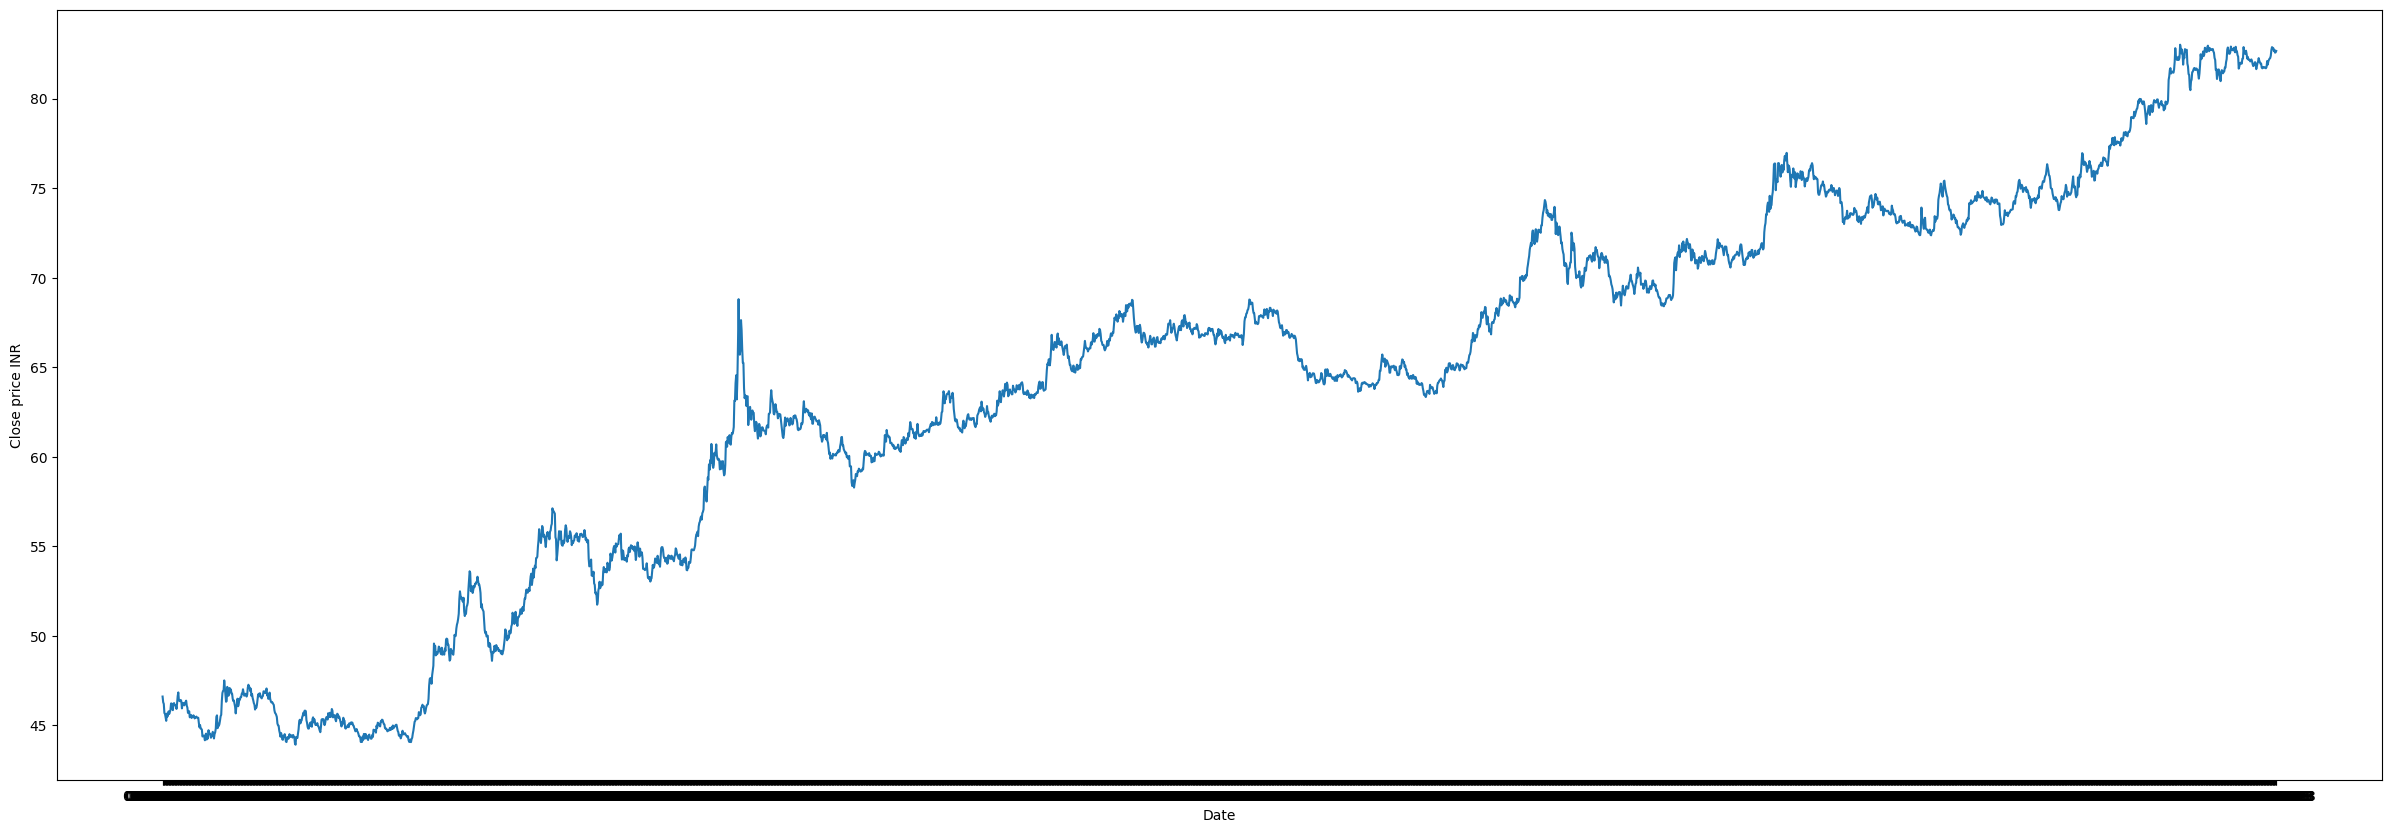

In [8]:
plt.figure(figsize=(30,10))
plt.plot(data_csv['Price'])
plt.xlabel('Date')
plt.ylabel('Close price INR')
plt.show()

In [11]:
df1=data_csv.reset_index()['Price']
df1

0       46.615
1       46.295
2       46.205
3       45.695
4       45.650
         ...  
3493    82.670
3494    82.733
3495    82.570
3496    82.586
3497    82.665
Name: Price, Length: 3498, dtype: float64

In [13]:
df1.shape

(3498,)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1.shape

(3498, 1)

In [18]:
df1

array([[0.06881907],
       [0.06063242],
       [0.05832992],
       ...,
       [0.9886666 ],
       [0.98907593],
       [0.99109701]])

In [23]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # Reshape the input data for LSTM (samples, time steps, features)
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
training_size = int(len(df1)*0.7)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [26]:
training_size, test_size

(2448, 1050)

In [25]:
train_data.shape, test_data.shape

((2448, 1), (1050, 1))

In [27]:
# converrt an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [28]:
time_step = 100
X_train, y_train  = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [29]:
X_train

array([[0.06881907, 0.06063242, 0.05832992, ..., 0.04272411, 0.06242325,
        0.07393573],
       [0.06063242, 0.05832992, 0.04528244, ..., 0.06242325, 0.07393573,
        0.0767499 ],
       [0.05832992, 0.04528244, 0.04413119, ..., 0.07393573, 0.0767499 ,
        0.07802906],
       ...,
       [0.6763201 , 0.66537045, 0.65608371, ..., 0.68166701, 0.67557818,
        0.67345477],
       [0.66537045, 0.65608371, 0.65309046, ..., 0.67557818, 0.67345477,
        0.67041036],
       [0.65608371, 0.65309046, 0.66708453, ..., 0.67345477, 0.67041036,
        0.67424785]])

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2347, 100), (949, 100), (2347,), (949,))

In [31]:
# reshape input to be [samples, time-steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2347, 100, 1), (949, 100, 1), (2347,), (949,))

In [33]:
# creating model 
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=75, batch_size=64, verbose=1)

Epoch 1/75
37/37 [==============================] - 11s 203ms/step - loss: 1.7850e-04 - val_loss: 1.6419e-04
Epoch 2/75
37/37 [==============================] - 6s 167ms/step - loss: 1.7535e-04 - val_loss: 1.0750e-04
Epoch 3/75
37/37 [==============================] - 6s 170ms/step - loss: 1.5862e-04 - val_loss: 2.4619e-04
Epoch 4/75
37/37 [==============================] - 6s 167ms/step - loss: 1.5316e-04 - val_loss: 9.9498e-05
Epoch 5/75
37/37 [==============================] - 6s 169ms/step - loss: 1.4739e-04 - val_loss: 1.0965e-04
Epoch 6/75
37/37 [==============================] - 6s 169ms/step - loss: 1.7494e-04 - val_loss: 1.4564e-04
Epoch 7/75
37/37 [==============================] - 6s 169ms/step - loss: 1.5696e-04 - val_loss: 9.4723e-05
Epoch 8/75
37/37 [==============================] - 6s 169ms/step - loss: 1.5221e-04 - val_loss: 9.8905e-05
Epoch 9/75
37/37 [==============================] - 6s 170ms/step - loss: 1.4652e-04 - val_loss: 2.9141e-04
Epoch 10/75
37/37 [========

In [78]:
# import tensorflow as tf
# # from keras.model import load_weights
# model = tf.keras.models.load_model('forex_model-stacked-LSTM-1.h5')

In [92]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

30/30 [==============================] - 1s 33ms/step


In [93]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [94]:
import math
from sklearn.metrics import mean_squared_error

# train data RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

60.23473664635518

In [95]:
# test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

75.43224897321085

In [107]:
model.save('forex_model-stacked-LSTM-4-75-epochs.h5')

In [54]:
len(test_predict)

949

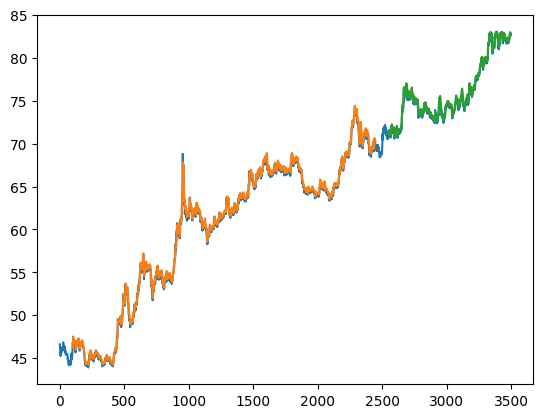

In [96]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [97]:
len(test_data)

1050

In [98]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [99]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.9647973802701595,
 0.9510591485878017,
 0.9556641424478098,
 0.9645671305771593,
 0.9646182971756037,
 0.9597574703233727,
 0.9546408104789192,
 0.9479635693819073,
 0.9607296356938189,
 0.9636972984036019,
 0.9610622185837083,
 0.959194637740483,
 0.9615483012689319,
 0.9618041342611543,
 0.9674068767908308,
 0.9671766270978306,
 0.9750818665575112,
 0.9793542775276298,
 0.9930157593123206,
 0.9960857552189928,
 0.9907132623823169,
 0.9871571837904212,
 0.9871316004911994,
 0.989229431027425,
 0.9973649201801063,
 0.9932715923045434,
 0.9922482603356524,
 0.9932715923045434,
 0.9918133442488741,
 0.9956764224314363,
 0.9953182562423251,
 0.9891782644289806,
 0.9970323372902168,
 0.9905085959885385,
 0.9904574293900941,
 0.9850849365534178,
 0.9830382726156361,
 0.9658974621367171,
 0.9692232910356118,
 0.9740841178878428,
 0.9728049529267293,
 0.9745957838722881,
 0.9730607859189517,
 0.9800961932050758,
 0.9803520261972982,
 0.9965974212034381,
 0.9899457634056488,
 0.987387433483

In [100]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        #shifting one postion ahead
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        #first cycle will start from here 
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.99466217]
101
1 day input [0.95105915 0.95566414 0.96456713 0.9646183  0.95975747 0.95464081
 0.94796357 0.96072964 0.9636973  0.96106222 0.95919464 0.9615483
 0.96180413 0.96740688 0.96717663 0.97508187 0.97935428 0.99301576
 0.99608576 0.99071326 0.98715718 0.9871316  0.98922943 0.99736492
 0.99327159 0.99224826 0.99327159 0.99181334 0.99567642 0.99531826
 0.98917826 0.99703234 0.9905086  0.99045743 0.98508494 0.98303827
 0.96589746 0.96922329 0.97408412 0.97280495 0.97459578 0.97306079
 0.98009619 0.98035203 0.99659742 0.98994576 0.98738743 0.9871316
 0.99140401 0.98700368 0.98012178 0.98262894 0.97868911 0.97848445
 0.97863795 0.97613078 0.97817745 0.97894494 0.97638661 0.97203745
 0.96947912 0.97050246 0.9731887  0.97510745 0.97229329 0.96512996
 0.96947912 0.97357245 0.97613078 0.98086369 0.97715411 0.97485162
 0.97280495 0.9731887  0.96743246 0.96628121 0.96692079 0.96819996
 0.96768829 0.96781621 0.96666496 0.96640913 0.96819996 0.97664245
 0.97152579 0.97638661 0.97851003 0

In [101]:
#taking the previous 100 outputs
day_new=np.arange(1,101)
#taking the next 30 values as per predictions
day_pred=np.arange(101,131)

In [102]:
len(df1)

3498

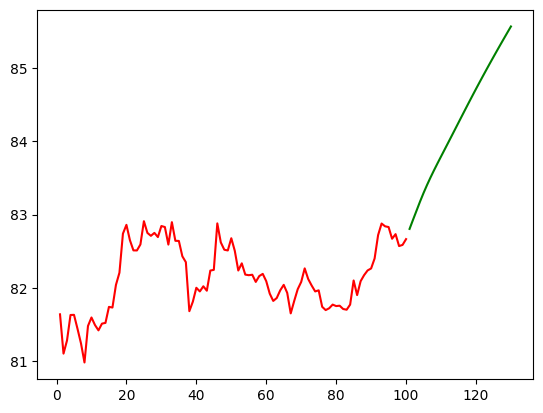

In [103]:
#Plotting for the previous values in the dataset
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]) , color="red")
#Plotting for the predicted values
plt.plot(day_pred,scaler.inverse_transform(lst_output) , color="green")

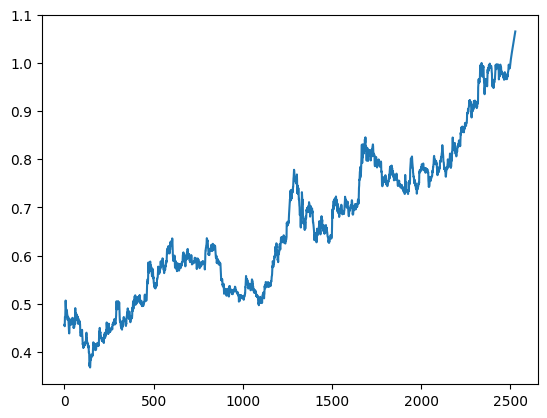

In [105]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:] )

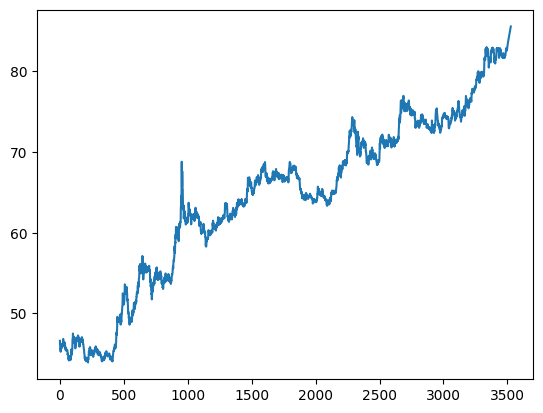

In [106]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)